In [507]:
import pandas as pd
import numpy as np
import requests
import re

## Gathering data

In [508]:
twitter_archive_enhanced = pd.read_csv('twitter-archive-enhanced.csv')

In [509]:
twitter_archive_enhanced.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [510]:
res = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
with open('image_predictions.tsv', mode='wb') as file:    
    file.write(res.content)

In [511]:
image_predictions = pd.read_csv('image_predictions.tsv', sep='\t')

In [512]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [513]:
#import tweepy
#from tweepy import OAuthHandler
#import json
#from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
#consumer_key = 'HIDDEN'
#consumer_secret = 'HIDDEN'
#access_token = 'HIDDEN'
#access_secret = 'HIDDEN'

#auth = OAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_token, access_secret)

#api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
#tweet_ids = twitter_archive_enhanced.tweet_id.values
#len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
#count = 0
#fails_dict = {}
#start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
#with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    #for tweet_id in tweet_ids:
        #count += 1
        #print(str(count) + ": " + str(tweet_id))
        #try:
           # tweet = api.get_status(tweet_id, tweet_mode='extended')
           # print("Success")
           # json.dump(tweet._json, outfile)
           # outfile.write('\n')
       # except tweepy.TweepError as e:
          #  print("Fail")
          #  fails_dict[tweet_id] = e
          #  pass
#end = timer()
#print(end - start)
#print(fails_dict)

In [514]:
df_3 = []
with open('tweet_json.txt', 'r') as file:  
    for row in file:        
        tweet_id = re.compile('"id": (\d+)').findall(row)[0]
        retweet_count = re.compile('"retweet_count": (\d+)').findall(row)[0]
        favorite_count = re.compile('"favorite_count": (\d+)').findall(row)[0]
        df_3.append({'tweet_id': tweet_id, 'retweet_count': retweet_count,
                'favorite_count': favorite_count}) 

In [515]:
df_counts = pd.DataFrame(df_3,columns =['tweet_id', 'retweet_count', 'favorite_count'])

In [516]:
df_counts.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


# Assessing Data

In [517]:
twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [518]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [519]:
df_counts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null object
retweet_count     2354 non-null object
favorite_count    2354 non-null object
dtypes: object(3)
memory usage: 55.2+ KB


In [520]:
df_counts.isnull().count()

tweet_id          2354
retweet_count     2354
favorite_count    2354
dtype: int64

In [521]:
df_counts[df_counts.tweet_id.duplicated()]

,tweet_id,retweet_count,favorite_count


In [522]:
image_predictions['p3_dog'].isnull().sum()

0

In [523]:
image_predictions[image_predictions['jpg_url'].duplicated()].count()

tweet_id    66
jpg_url     66
img_num     66
p1          66
p1_conf     66
p1_dog      66
p2          66
p2_conf     66
p2_dog      66
p3          66
p3_conf     66
p3_dog      66
dtype: int64

In [524]:
twitter_archive_enhanced['doggo'].value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [525]:
twitter_archive_enhanced['name'].value_counts()[0:5]

None       745
a           55
Charlie     12
Oliver      11
Cooper      11
Name: name, dtype: int64

In [526]:
twitter_archive_enhanced[twitter_archive_enhanced['tweet_id'].duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [527]:
image_predictions['p1_dog'].value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [528]:
twitter_archive_enhanced['timestamp'].str.find('+0000').count()

2356

In [529]:
twitter_archive_enhanced[twitter_archive_enhanced['rating_denominator'] == 0].iloc[0,5]

"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho"

In [530]:
twitter_archive_enhanced['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [531]:
twitter_archive_enhanced['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [532]:
twitter_archive_enhanced[twitter_archive_enhanced['rating_numerator'] == 75].iloc[1]['text']

"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS"

In [533]:
list(twitter_archive_enhanced[twitter_archive_enhanced['tweet_id'] == 810984652412424192]['text'])

['Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx']

In [534]:
twitter_archive_enhanced['expanded_urls'].isnull().sum()

59

In [535]:
twitter_archive_enhanced[twitter_archive_enhanced['expanded_urls'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Jenna_Marbles: @dog_rates Thanks for ratin...,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None


In [536]:
twitter_archive_enhanced[twitter_archive_enhanced['text'].str.contains('only rate dogs')].count()

tweet_id                      64
in_reply_to_status_id          1
in_reply_to_user_id            1
timestamp                     64
source                        64
text                          64
retweeted_status_id            9
retweeted_status_user_id       9
retweeted_status_timestamp     9
expanded_urls                 64
rating_numerator              64
rating_denominator            64
name                          64
doggo                         64
floofer                       64
pupper                        64
puppo                         64
dtype: int64

In [537]:
list(twitter_archive_enhanced[twitter_archive_enhanced['name'] == 'None']['text'])[170:180]

['RT @dog_rates: I want to finally rate this iconic puppo who thinks the parade is all for him. 13/10 would absolutely attend https://t.co/5d…',
 "Here's a sleepy doggo that requested some assistance. 12/10 would carry everywhere https://t.co/bvkkqOjNDV",
 '#ImWithThor 13/10\nhttps://t.co/a18mzkhTf6',
 "I didn't believe it at first but now I can see that voter fraud is a serious h*ckin issue. 11/10 https://t.co/7i0bDMbrVN",
 'Elder doggo does a splash. Both 13/10 incredible stuff https://t.co/gBUDjdEcqz',
 "RT @dog_rates: When she says you're a good boy and you know you're a good boy because you're a good boy. 13/10 https://t.co/O5IUmRHRIh",
 'Oh h*ck look at this spookling right here. Fright level off the charts. 12/10 sufficiently spooked https://t.co/BNy9IIJMb0',
 'Your favorite squad is looking extra h*ckin spooky today. 13/10 for all https://t.co/PrgvOyPtDT',
 'RT @dog_rates: This little fella really hates stairs. Prefers bush. 13/10 legendary pupper https://t.co/e3LPMAHj7p',
 "RT

# quality
#### df_counts table:
 - retweet_count ,favorite_count, and tweet_id are strings not int 
 - the table contains less values than the number of the 2356 in witter_archive_enhanced table
 
#### twitter_archive_enhanced table: 
 - there are non original ratings (replies and retweets)
 - there are tweets for things other than dogs
 - Erroneous datatypes (timestamp column)
 - values in the source column are HTML tags
 - Nulls represented as (None) in (name, doggo, floofer, pupper, puppo) columns
 - Inaccurate values in name column
 - +0000 in the timestamp column
 - 810984652412424192 id has no rating
 - Inaccurate values in rating_denominator column
 - Inaccurate values in rating_numerator
 - missing values in expanded_urls column
 - Inaccurate values in (doggo, floofer, pupper, puppo) columns
 - Inaccurate values rating_numerator(75 instead of 9.75)
 
#### image_predictions table:
 - p1_dog, p2_dog, p3_dog not always true, the predictions not a dog
 - duplicated jpg_url values

# tidiness
 - df_counts should be part of the twitter_archive_enhanced table
 - image_predictions should be part of the twitter_archive_enhanced table
 - (doggo, floofer, pupper, puppo) columns should be one column in twitter_archive_enhanced table
 - predictions should be in one column in image_predictions table

# cleaning

In [538]:
archive_clean = twitter_archive_enhanced.copy()
image_predictions_clean = image_predictions.copy()
df_counts_clean = df_counts.copy()

### missing data

#### define 
twitter_archive_enhanced: Drop the replies and retweets

#### code

In [539]:
archive_clean = archive_clean[archive_clean['retweeted_status_id'].isnull()]
archive_clean = archive_clean[archive_clean['in_reply_to_status_id'].isnull()]

In [540]:
cloD = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']
archive_clean.drop(columns= cloD, inplace= True)
archive_clean.reset_index(drop=True, inplace=True)

#### test 

In [541]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2097 entries, 0 to 2096
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: int64(3), object(9)
memory usage: 196.7+ KB


#### define 
image_predictions: Drop the non dog predictions in p1_dog, p2_dog, p3_dog

#### code 

In [542]:
d1 = image_predictions_clean[image_predictions_clean['p1_dog'] == False]
d1 = d1[d1['p2_dog'] == False]
d1 = d1[d1['p3_dog'] == False]

In [543]:
d1_d= list(d1.index.values)
image_predictions_clean.drop(d1_d, inplace= True)
image_predictions_clean.reset_index(drop=True, inplace=True)

#### test

In [544]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1751 entries, 0 to 1750
Data columns (total 12 columns):
tweet_id    1751 non-null int64
jpg_url     1751 non-null object
img_num     1751 non-null int64
p1          1751 non-null object
p1_conf     1751 non-null float64
p1_dog      1751 non-null bool
p2          1751 non-null object
p2_conf     1751 non-null float64
p2_dog      1751 non-null bool
p3          1751 non-null object
p3_conf     1751 non-null float64
p3_dog      1751 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 128.3+ KB


In [545]:
image_predictions_clean.groupby(['p1_dog', 'p2_dog', 'p3_dog']).count()

tweet_id  jpg_url  img_num    p1  p1_conf    p2  \
p1_dog p2_dog p3_dog                                                    
False  False  True          64       64       64    64       64    64   
       True   False         54       54       54    54       54    54   
              True         101      101      101   101      101   101   
True   False  False         43       43       43    43       43    43   
              True          91       91       91    91       91    91   
       True   False        155      155      155   155      155   155   
              True        1243     1243     1243  1243     1243  1243   

                      p2_conf    p3  p3_conf  
p1_dog p2_dog p3_dog                          
False  False  True         64    64       64  
       True   False        54    54       54  
              True        101   101      101  
True   False  False        43    43       43  
              True         91    91       91  
       True   False       155   155      155  
              True       1243  1243     1243

#### define 
twitter_archive_enhanced: Re extracte the `rating_numerator` column

#### code 

In [546]:
numerator = []
for text in archive_clean['text']:
    a = re.compile('(\d*\.?\d*)/10').findall(text)
    if len(a) == 0:    
        a = re.compile('(\d*\.?\d*)/\d+').findall(text)[0]
    else:
        a = re.compile('(\d*\.?\d*)/10').findall(text)[0]        
    # to avoid extracting '.'
    if a[0] == '.':
        a = a[1:]
    numerator.append(a)
len(numerator)  

archive_clean['rating_numerator'] = numerator

#### test

In [547]:
archive_clean['rating_numerator'].value_counts()

12       486
10       437
11       414
13       288
9        153
8         98
7         51
14        39
5         33
6         32
3         19
4         15
2          9
1          4
24         1
144        1
99         1
121        1
11.26      1
13.5       1
84         1
204        1
1776       1
60         1
9.75       1
88         1
45         1
420        1
11.27      1
44         1
165        1
80         1
0          1
Name: rating_numerator, dtype: int64

#### define: 
remove tweet_id 810984652412424192

#### code 

In [548]:
archive_clean.drop(index=403, inplace= True)
archive_clean.reset_index(drop=True, inplace=True)

### test

In [549]:
archive_clean[archive_clean['rating_denominator'] == 7]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### define: 
twitter_archive_enhanced: Re extracte the rating_denominator column

#### code

In [550]:
denominator = []
for text in archive_clean['text']:
    a = re.compile('\d*\.?\d*/(10)').findall(text)
    if len(a) == 0:    
        a = re.compile('\d*\.?\d*/(\d+)').findall(text)[0]
    else:
        a = re.compile('\d*\.?\d*/(10)').findall(text)[0]
    # to avoid extracting '.'
    if a[0] == '.':
        a = a[1:]
    denominator.append(a)  
archive_clean['rating_denominator'] = denominator

#### test 

In [551]:
archive_clean['rating_denominator'].value_counts()

10     2085
50        2
80        2
110       1
150       1
170       1
90        1
40        1
120       1
70        1
Name: rating_denominator, dtype: int64

#### define
twitter_archive_enhanced: remove tweets for things other than dogs

#### code

In [552]:
archive_clean = archive_clean[~archive_clean['text'].str.contains('only rate dogs')]
archive_clean = archive_clean[~archive_clean['text'].str.contains('don\'t send')]
archive_clean = archive_clean[~archive_clean['text'].str.contains('stop sending')]
archive_clean = archive_clean[~archive_clean['text'].str.contains('only send')]
archive_clean.reset_index(drop=True, inplace=True)

#### test

#### define
twitter_archive_enhanced: Rename the name column whose value is 'a','an', 'the' or 'None'

#### code

In [553]:
def nNames(dogs):    
    text = dogs['text']
    name = dogs['name']
    a = name
    if name == 'a':
        if 'named ' in text:    
            a = re.compile('named (\w+)').findall(text)[0]
        elif 'name is ' in text:
            a = re.compile('name is (\w+)').findall(text)[0]
        else:
            a = 'No name provided'
    elif name == 'an':
        if 'named ' in text:    
            a = re.compile('named (\w+)').findall(text)[0]
        elif 'name is ' in text:
            a = re.compile('name is (\w+)').findall(text)[0]
        else:
            a = 'No name provided'
    elif name == 'None':
        if 'named ' in text:    
            a = re.compile('named (\w+)').findall(text)[0]
        elif 'name is ' in text:
            a = re.compile('name is (\w+)').findall(text)[0]
        else:
            a = 'No name provided'
    elif name == 'the':
        if 'named ' in text:    
            a = re.compile('named (\w+)').findall(text)[0]
        elif 'name is ' in text:
            a = re.compile('name is (\w+)').findall(text)[0]
        else:
            a = 'No name provided'        
    return a
    
archive_clean['name'] = archive_clean.apply(nNames, axis=1).str.title()

#### test

In [554]:
archive_clean = archive_clean[archive_clean['name'] != "Such"]


In [555]:
archive_clean['name'].value_counts()

No Name Provided    585
Charlie              11
Lucy                 11
Cooper               10
Oliver               10
Tucker                9
Penny                 9
Lola                  8
Winston               8
Sadie                 8
Toby                  7
Daisy                 7
Jax                   6
Bo                    6
Bella                 6
Stanley               6
Oscar                 6
Koda                  6
Bailey                6
Buddy                 5
Bentley               5
Dave                  5
Louis                 5
Milo                  5
Leo                   5
Rusty                 5
Chester               5
Scout                 5
Brody                 4
Archie                4
                   ... 
Ruffles               1
Beemo                 1
Tickles               1
Philbert              1
Rambo                 1
Bluebert              1
Lambeau               1
Sephie                1
Katie                 1
Banditt               1
Odin            

#### define: 
Reextracting expanded_urls rows



#### code

In [556]:
archive_clean['expanded_urls'] = 'https://twitter.com/dog_rates/status/' + archive_clean['tweet_id'].astype(str)

#### test

In [557]:
archive_clean[archive_clean['expanded_urls'].isnull()]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [558]:
archive_clean.sample(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
802,742161199639494656,2016-06-13 01:06:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Doug. He's trying to float away. 12/10...,https://twitter.com/dog_rates/status/742161199...,12,10,Doug,None,None,None,None
477,790987426131050500,2016-10-25 18:44:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Misty. She has a cowboy hat on her nos...,https://twitter.com/dog_rates/status/790987426...,12,10,Misty,None,None,None,None
1373,682389078323662849,2015-12-31 02:33:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Brody. He's a Downton Abbey Falsetto. Add...,https://twitter.com/dog_rates/status/682389078...,9,10,Brody,None,None,None,None


#### define : 
image_predictions: remove duplicated jpg_url values
    

    
#### code

In [559]:
image_predictions_clean.drop_duplicates(subset=['jpg_url'], inplace=True)
archive_clean.reset_index(drop=True, inplace=True)

#### test

In [560]:
image_predictions_clean[image_predictions_clean['jpg_url'].duplicated()].count()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

### tidiness
#### define : 
twitter_archive_enhanced: melting the ['pupper','doggo','puppo','floofer'] columns into one column, and droping them

#### code

In [561]:
#another way to deal with dog stages

#archive_clean['doggo'].replace('None', '', inplace=True)
#archive_clean['floofer'].replace('None', '', inplace=True)
#archive_clean['pupper'].replace('None', '', inplace=True)
#archive_clean['puppo'].replace('None', '', inplace=True)


#archive_clean['dog_stage'] = archive_clean['doggo'] + archive_clean['floofer'] + archive_clean['pupper'] + archive_clean['puppo']

#archive_clean.loc[archive_clean['dog_stage'] == 'doggopupper', 'dog_stage'] = 'doggo, pupper'
#archive_clean.loc[archive_clean['dog_stage'] == 'doggopuppo', 'dog_stage'] = 'doggo, puppo'
#archive_clean.loc[archive_clean['dog_stage'] == 'doggofloofer', 'dog_stage'] = 'doggo, floofer'

# handle missing values
#archive_clean.loc[archive_clean.dog_stage == '', 'dog_stage'] = np.nan

In [562]:
def stages(dogs):
    text = dogs['text']
    a = ''
    for stage in ['pupper','doggo','puppo','floofer']: 
        if stage in text or stage.title() in text: 
            a = a + ', '+ stage            
    return a[2:]

In [563]:
archive_clean['dog_stage'] = archive_clean.apply(stages, axis=1)
archive_clean.loc[archive_clean['dog_stage'] == '', 'dog_stage'] = np.nan

In [564]:
archive_clean['dog_stage'].value_counts()

pupper           243
doggo             78
puppo             28
floofer            9
pupper, doggo      8
doggo, puppo       2
Name: dog_stage, dtype: int64

In [565]:
sT = ['pupper','doggo','puppo','floofer']
archive_clean.drop(columns= sT, inplace= True)
archive_clean.reset_index(drop=True, inplace=True)

#### test

In [566]:
archive_clean['dog_stage'].value_counts()

pupper           243
doggo             78
puppo             28
floofer            9
pupper, doggo      8
doggo, puppo       2
Name: dog_stage, dtype: int64

In [567]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2024 entries, 0 to 2023
Data columns (total 9 columns):
tweet_id              2024 non-null int64
timestamp             2024 non-null object
source                2024 non-null object
text                  2024 non-null object
expanded_urls         2024 non-null object
rating_numerator      2024 non-null object
rating_denominator    2024 non-null object
name                  2024 non-null object
dog_stage             368 non-null object
dtypes: int64(1), object(8)
memory usage: 142.4+ KB


### tidiness
#### define : 
predictions making a predictions column baseed on what prediction is true (if p1 is false then the prediction is p2 ..etc)

In [568]:
def pred(dog):
    pre = None
    conf = 0.0
    if dog['p1_dog']:
        pre = dog['p1']        
    elif dog['p2_dog']:
        pre = dog['p2']        
    elif dog['p3_dog']:
        pre = dog['p3']        
        
    return pre

def conf(dog):    
    conf = 0.0
    if dog['p1_dog']:        
        conf = dog['p1_conf']
    elif dog['p2_dog']:
        conf = dog['p2_conf']
    elif dog['p3_dog']:
        conf = dog['p3_conf']  
        
    return conf

In [569]:
image_predictions_clean['dog_prediction'] = image_predictions_clean.apply(pred, axis=1).str.replace('_', ' ')
image_predictions_clean['predictions_Reliability(%)'] = image_predictions_clean.apply(conf, axis=1) * 100

In [570]:
Pr = ['p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog']
image_predictions_clean.drop(columns= Pr, inplace= True)
image_predictions_clean.reset_index(drop=True, inplace=True)

#### test

In [571]:
image_predictions_clean.sample(5)

,tweet_id,jpg_url,img_num,dog_prediction,predictions_Reliability(%)
483,680494726643068929,https://pbs.twimg.com/media/CXGaVxOWAAADjhF.jpg,1,kuvasz,43.8627
459,679132435750195208,https://pbs.twimg.com/media/CWzDWOkXAAAP0k7.jpg,1,Scottish deerhound,19.4610
1632,878057613040115712,https://pbs.twimg.com/media/DC98vABUIAA97pz.jpg,1,French bulldog,83.9097
301,673688752737402881,https://pbs.twimg.com/media/CVlsVs3WIAAja6m.jpg,1,soft-coated wheaten terrier,34.0806
160,669926384437997569,https://pbs.twimg.com/media/CUwOfnDWcAIXryP.jpg,1,Pomeranian,98.4231


In [572]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1691 entries, 0 to 1690
Data columns (total 5 columns):
tweet_id                      1691 non-null int64
jpg_url                       1691 non-null object
img_num                       1691 non-null int64
dog_prediction                1691 non-null object
predictions_Reliability(%)    1691 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 66.1+ KB


### cleaning
#### define: 
twitter_archive_enhanced:cleaning values in 'source' column
    
 
#### code

In [573]:
def source(dog):   
    sour = dog['source']
    if 'iPhone' in sour:        
        source = 'iPhone'
    elif 'Vine' in sour:
        source = 'Vine'
    elif 'Web' in sour:
        source = 'Web Client' 
    elif 'TweetDeck' in sour:
        source = 'TweetDeck'         
        
    return source
archive_clean['source'] = archive_clean.apply(source, axis=1)

#### test

In [574]:
archive_clean['source'].value_counts()

iPhone        1893
Vine            90
Web Client      31
TweetDeck       10
Name: source, dtype: int64

#### define 
twitter_archive_enhanced:removing (+0000) from'timestamp' column 
    
    
#### code    

In [575]:
archive_clean['timestamp'] = archive_clean['timestamp'].str[:-5]

#### test

In [576]:
archive_clean.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
537,780931614150983680,2016-09-28 00:46:20,iPhone,I want to finally rate this iconic puppo who t...,https://twitter.com/dog_rates/status/780931614...,13,10,No Name Provided,puppo
296,824325613288833024,2017-01-25 18:38:36,iPhone,Retweet the h*ck out of this 13/10 pupper #Bel...,https://twitter.com/dog_rates/status/824325613...,13,10,No Name Provided,pupper
645,761004547850530816,2016-08-04 01:03:17,iPhone,This is Bo and Ty. Bo eats paper and Ty felt l...,https://twitter.com/dog_rates/status/761004547...,11,10,Bo,NaN
1690,672222792075620352,2015-12-03 01:16:17,iPhone,This is Cal. He's a Swedish Geriatric Cheddar....,https://twitter.com/dog_rates/status/672222792...,9,10,Cal,NaN
1142,698178924120031232,2016-02-12 16:16:41,iPhone,This is Lily. She accidentally dropped all her...,https://twitter.com/dog_rates/status/698178924...,10,10,Lily,NaN


#### define 
twitter_archive_enhanced:changing the datatype of timestamp, rating_numerator , rating_denominator columns 
    
    
#### code    

In [610]:
archive_clean = archive_clean.astype({'tweet_id': 'object', 'rating_denominator': 'float', 'rating_numerator': 'float', 'timestamp': 'datetime64', 'dog_stage':'category'})

In [611]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2024 entries, 0 to 2023
Data columns (total 9 columns):
tweet_id              2024 non-null object
timestamp             2024 non-null datetime64[ns]
source                2024 non-null object
text                  2024 non-null object
expanded_urls         2024 non-null object
rating_numerator      2024 non-null float64
rating_denominator    2024 non-null float64
name                  2024 non-null object
dog_stage             368 non-null category
dtypes: category(1), datetime64[ns](1), float64(2), object(5)
memory usage: 128.8+ KB


#### define 
df_counts :changing the datatype of tweet_id, retweet_count, favorite_count columns 
    
    
#### code    

In [609]:
df_counts_clean = df_counts_clean.astype({'tweet_id': 'object', 'retweet_count': 'int', 'favorite_count': 'int'})

In [612]:
df_counts_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null object
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


#### define 
image_predictions_clean :changing the datatype of tweet_id column
    
    
#### code    

In [605]:
image_predictions_clean = image_predictions_clean.astype({'tweet_id': 'object'})

In [606]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1691 entries, 0 to 1690
Data columns (total 5 columns):
tweet_id                      1691 non-null object
jpg_url                       1691 non-null object
img_num                       1691 non-null int64
dog_prediction                1691 non-null object
predictions_Reliability(%)    1691 non-null float64
dtypes: float64(1), int64(1), object(3)
memory usage: 66.1+ KB


### tidiness
#### define : 
 merging df_counts and image_predictions_clean with archive_clean

    

#### code    

In [598]:
twitter_archive_master = pd.merge(archive_clean, df_counts_clean , on='tweet_id')

In [600]:
twitter_archive_master = pd.merge(twitter_archive_master, image_predictions_clean , on='tweet_id')

In [601]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1602 entries, 0 to 1601
Data columns (total 15 columns):
tweet_id                      1602 non-null int64
timestamp                     1602 non-null datetime64[ns]
source                        1602 non-null object
text                          1602 non-null object
expanded_urls                 1602 non-null object
rating_numerator              1602 non-null float64
rating_denominator            1602 non-null float64
name                          1602 non-null object
dog_stage                     280 non-null category
retweet_count                 1602 non-null int64
favorite_count                1602 non-null int64
jpg_url                       1602 non-null object
img_num                       1602 non-null int64
dog_prediction                1602 non-null object
predictions_Reliability(%)    1602 non-null float64
dtypes: category(1), datetime64[ns](1), float64(3), int64(4), object(6)
memory usage: 189.5+ KB


In [602]:
twitter_archive_master.to_csv('twitter_archive_master.csv')

In [603]:
twitter_archive_master.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,jpg_url,img_num,dog_prediction,predictions_Reliability(%)
0,892177421306343426,2017-08-01 00:17:27,iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,NaN,6514,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,32.3581
1,891815181378084864,2017-07-31 00:18:03,iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,NaN,4328,25461,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,71.6012
2,891689557279858688,2017-07-30 15:58:51,iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,NaN,8964,42908,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Labrador retriever,16.8086
3,891327558926688256,2017-07-29 16:00:24,iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,NaN,9774,41048,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,55.5712
4,891087950875897856,2017-07-29 00:08:17,iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13.0,10.0,No Name Provided,NaN,3261,20562,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake Bay retriever,42.5595


In [614]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1602 entries, 0 to 1601
Data columns (total 15 columns):
tweet_id                      1602 non-null object
timestamp                     1602 non-null datetime64[ns]
source                        1602 non-null object
text                          1602 non-null object
expanded_urls                 1602 non-null object
rating_numerator              1602 non-null float64
rating_denominator            1602 non-null float64
name                          1602 non-null object
dog_stage                     280 non-null category
retweet_count                 1602 non-null int64
favorite_count                1602 non-null int64
jpg_url                       1602 non-null object
img_num                       1602 non-null int64
dog_prediction                1602 non-null object
predictions_Reliability(%)    1602 non-null float64
dtypes: category(1), datetime64[ns](1), float64(3), int64(3), object(7)
memory usage: 189.5+ KB


In [613]:
twitter_archive_master = twitter_archive_master.astype({'tweet_id': 'object'})

## Analyzing, and Visualizing

In [617]:
# which dog stage has the highest number of retweets
rt = twitter_archive_master.groupby('dog_stage')['retweet_count'].describe().sort_values(by='mean', ascending=False)
rt['mean']

dog_stage
doggo, puppo     11483.500000
doggo             6811.122807
puppo             6252.923077
pupper, doggo     5225.333333
floofer           4968.714286
pupper            2384.609890
Name: mean, dtype: float64

In [618]:
#the total number of retweets and favorites for the top 10 dog predictions
D1 = twitter_archive_master[twitter_archive_master['predictions_Reliability(%)'] > 50.0].groupby('dog_prediction').sum().sort_values(by=['retweet_count'], ascending = False)[['retweet_count','favorite_count']]
D1[:10]

,retweet_count,favorite_count
dog_prediction,,
golden retriever,406578,1375623
Labrador retriever,268199,817090
Pembroke,249190,871599
Chihuahua,151148,424292
Samoyed,109065,308342
French bulldog,104639,379865
Pomeranian,79238,220281
Eskimo dog,70439,154332
toy poodle,69302,181882


In [620]:
#the number and the mean of ratings for each dog prediction
twitter_archive_master['normalized_rate'] = twitter_archive_master['rating_numerator'] / twitter_archive_master['rating_denominator']
D2 = twitter_archive_master[twitter_archive_master['predictions_Reliability(%)'] > 50.0].groupby('dog_prediction')['normalized_rate'].describe().sort_values(by=['count'], ascending = False)[['count', 'mean']][:10]
D2

,count,mean
dog_prediction,,
golden retriever,112.0,1.166518
Pembroke,67.0,1.167164
Labrador retriever,60.0,1.125000
Chihuahua,46.0,1.056522
pug,40.0,1.027500
Pomeranian,29.0,1.117241
Samoyed,26.0,1.184615
toy poodle,23.0,1.113043
chow,22.0,1.172727


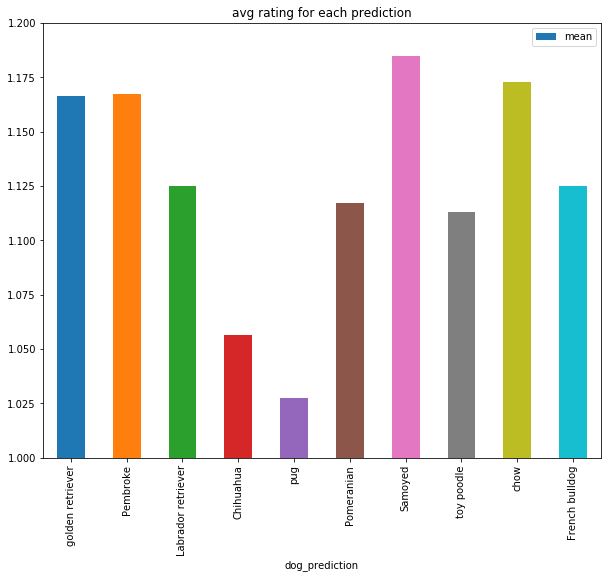

In [621]:
D2.plot(y= 'mean', kind = 'bar', figsize= (10,8), title = 'avg rating for each prediction',ylim = [1,1.2])

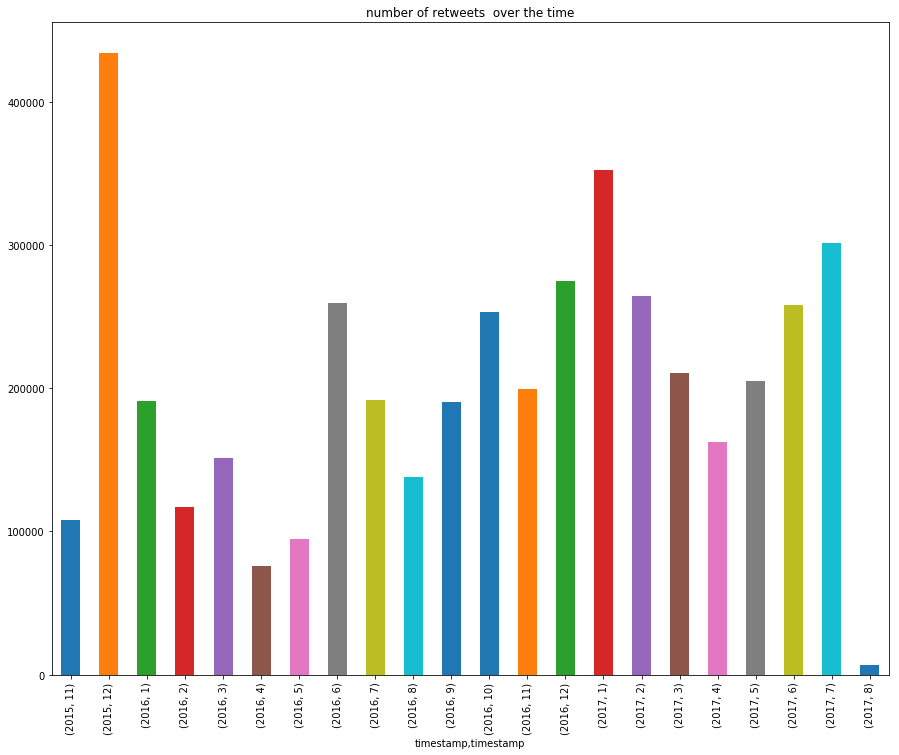

In [622]:
D3 = twitter_archive_master.groupby([twitter_archive_master['timestamp'].dt.year, twitter_archive_master['timestamp'].dt.month])['retweet_count'].sum()
D3.plot(kind="bar", figsize= (15,12), title = 'number of retweets  over the time')

In [623]:
D4 = twitter_archive_master[twitter_archive_master['dog_stage'] != 'No stage provided']
stg = ['pupper','doggo','puppo','floofer']
num = []
pre = []
for s in stg:
    D5 = D4[D4['dog_stage'] == s]
    pre.append(D5['dog_prediction'].value_counts().index[0])
    num.append(D5['dog_prediction'].value_counts()[0])

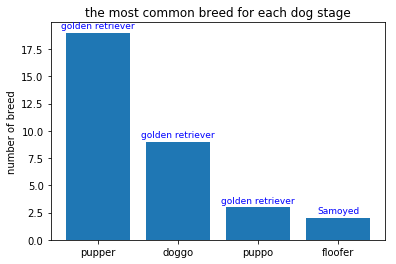

In [624]:
import matplotlib.pyplot as plt
bars = plt.bar(range(len(stg)), num)
plt.xticks(range(len(stg)),stg)
plt.title('the most common breed for each dog stage')
plt.ylabel('number of breed')
for i in range(4):    
    plt.text(i,bars[i].get_height()+0.4,pre[i], ha='center', color='b', fontsize=9)  

In [628]:
#does number of images has any effect?
#yes, ot has positive effect on retweets, favorites, predictions_Reliability(%), rate
D6 = twitter_archive_master.groupby(twitter_archive_master['img_num']).mean()
D6.iloc[:,2:]

,retweet_count,favorite_count,predictions_Reliability(%),normalized_rate
img_num,,,,
1,2570.011038,8355.264901,53.285995,1.071728
2,3798.164634,12536.341463,63.305786,1.138415
3,4042.153846,12791.307692,63.105681,1.171154
4,4274.407407,15059.888889,78.797520,1.229630


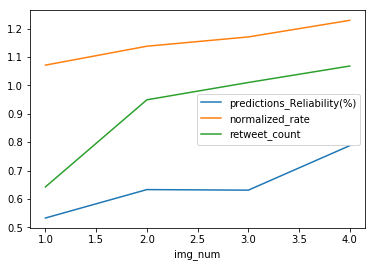

In [629]:
D6 = twitter_archive_master.groupby(twitter_archive_master['img_num'])['predictions_Reliability(%)'].mean() / 100
D7 = twitter_archive_master.groupby(twitter_archive_master['img_num'])['normalized_rate'].mean() 
D8 = twitter_archive_master.groupby(twitter_archive_master['img_num'])['retweet_count'].mean() / 4000
li = D6.plot(legend = True)
l2 = D7.plot(legend = True)
l3 = D8.plot(legend = True)